# Fuerza nuclear fuerte y potencial de yukawa

Una de las 4 fuerzas del universo es la electromágnetica, es la que nos dice que partículas cargadas de signos opuestos se atraerán y las del mismo signo sentirán una repulsión. 

La expresión matemática que rige este fenómeno se le conoce como ley de Coulomb, y se ve de la siguiente manera:

$$ F= \dfrac{kq_1q_2}{r^2}$$

Donde:
 * k= $ \dfrac{1}{4\pi \epsilon _0}$
 * q_1 = carga de la partícula 1
 * q_2 = carga de la partícula 2
 * r = distancia entre las dos partículas
 

 Esta Ley es de mucha utilidad, sin embargo, ¿Si esta ley es cierta porqué los protones en los núcleos atómicos no salen disparados por la repulsión entre ellos?
 
 Esto se debe a otra de las 4 fuerzas fundamentales conocida como la Fuerza Nuclear Fuerte
 
 Esta fuerza se puede simular matematicamente de distintas formas, una de las mas comunes es usando una expresión de potencial propuesto por Hideki Yukawa en los años 30 que se le conoce como potencial de Yukawa:
 $$V(r)=\dfrac{-g_s}{4\pi r} e^{\dfrac{-mrc}{\hbar}} $$
 
 Este potencial es de muy corto alcance,ganándole al potencial electromagnético a distancias inferiores a 1 femtómetro

Para facilitar los cálculos usaremos solo dos constantes quedando entonces de la siguiente forma:
$$V(r)=-\dfrac{g_s e^{-r\alpha}}{r} $$
Y para encontrar la fuerza resultante de este potencial usaremos la siguiente relación:
$$F=-\nabla V(r) $$

De esta manera nos queda que la fuerza nuclear fuerte nos queda de la siguiente manera:
$$F=-\dfrac{g_s\alpha e^{-r\alpha}}{r} -\dfrac{g_se^{-r\alpha}}{r^2} $$

In [6]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
k=1/(4*np.pi*8.85418782*10**(-12)) #constante de coulumb
e=1.602176565*10**(-19) #carga del electron
hbar=1.05457*10**(-34) # constante de planck reducida
c= 2.99792*10**8 #velocidad de la luz
mp=139.6*1.60218*10**(-13)/(c**2)
gs=3*10**(-28)
alpha=7*10**(14)

In [3]:
x=np.linspace(.5*10**(-15),8*10**(-15),1000)

Definimos los potenciales y las fuerzas para dos protones en un núcleo:

In [4]:
Vcoulomb=k*e**2*x**(-1) 
Vyukawa=-gs*np.exp(-x*alpha)*x**(-1)
Fcoulomb=k*e**2*(x)**(-2) 
Fyukawa=-gs*alpha*np.exp(-alpha*x)*x**-1-gs*np.exp(-alpha*x)*x**-2

<IPython.core.display.Javascript object>


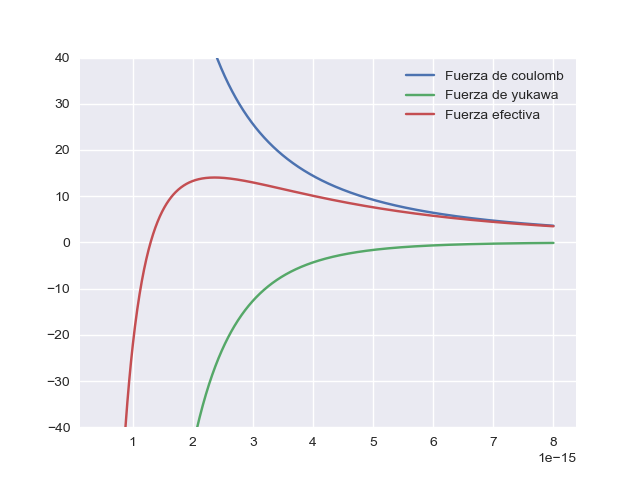

In [7]:
plt.plot(x,Fcoulomb,label='Fuerza de coulomb')
plt.plot(x,Fyukawa,label='Fuerza de yukawa')
plt.plot(x,Fyukawa +Fcoulomb,label='Fuerza efectiva')
plt.ylim(-40, 40)
plt.legend()

In [8]:
def potencial(r):
     return k*e**2*(r)**(-2)-gs*alpha*exp(-alpha*r)*r**-1-gs*exp(-alpha*r)*r**-2

Como podemos notar, la fuerza resultante tiene un máximo que indica el punto en el que los protones sentirán mayor repulsión, para encontrar ese máximo vamos a optimizar usando el método de enjambre de partículas

## Enjambre de partículas

Es una forma de optimización que emula el comportamiento de partículas en la naturaleza, las posiciones y velocidades en una iteración k para una particula i están regidas por las siguientes fórmulas:

Posición de la partíula:
$$x_{k+1}^i=x_k ^i+v_{k+1} ^i$$
Velocidad de la partícula
$$v_{k+1}^i = w_k v_k ^i +c_1 r_1(p_k ^i-x_k^i)+c_2r_2(p_k^g-x_k^i)$$

Así pues, en vez de usar nosotros alguna librería ya establecida para este método, optamos por programar nuestro propio algorítmo de PSO para este problema (u otros problemas de 1 variable)

In [9]:
import random

In [10]:
while True:
    iteraciones=100
    w=.5
    c1=1
    c2=3
    n=15 #número de partículas
    r1=random.uniform(0,1)
    r2=random.uniform(0,1)
    posicion=[]
    velocidad=[]
        
    #Inicializamos partículas
    posiciones0=[]
    velocidades0=[]
    for i in range(n):
        posiciones0.append(random.uniform(.5*10**-15,12*10**-15))
    for i in range(n):
        velocidades0.append(random.uniform(-.5*10**-15,.5*10**-15))
    posicion.append(posiciones0)
    velocidad.append(velocidades0)   
        
#Optimizamos
    b=[] #Variable para guardar información
    for i in posicion[0]:
        b.append(i)
    fbest_i=(b) #Valor máximo individual encontrado
    p_i=posicion[0]#Cual fue la posición de la partícula cuando encontró este valor
    fbest_g=max(b) #Valor máximo del grupo de partículas
    p_g=posicion[0] #valor global máximo del grupo de partículas

    for i in range(0,iteraciones): #itearciones
        for j in range(n): #partículas
            if potencial(posicion[i][j])>= fbest_i[j]:
                fbest_i[j]=potencial(posicion[i][j])
                p_i[j]=posicion[i][j]
            if potencial(posicion[i][j])>=fbest_g :
                fbest_g=potencial(posicion[i][j])
                p_g=posicion[i][j]
        posicion.append([0]*n)
        velocidad.append([0]*n)
        for j in range(n):
            velocidad[i+1][j]=w*velocidad[i][j]+c1*r1*(p_i[j]-posicion[i][j])+c2*r2*(p_g-posicion[i][j])
            posicion[i+1][j]=posicion[i][j]+velocidad[i+1][j]
    if p_g > 0:
        break
print("El valor máximo es",fbest_g,"Newtons")
print("La posición del valor máximo es ",p_g,"metros")

El valor máximo es 14.0438395102606 Newtons
La posición del valor máximo es  2.36443081583975e-15 metros


## Animación del comportamiento del emjambre de partículas

Para tener una idea mas clara de lo que hace nuestro programa, optamos por animar el enjambre de partículas y así observar como de una posición aleatoria van convergiendo al valor máximo

In [13]:
def potencial2(i):
    return k*e**2*(i)**(-2)-gs*alpha*np.exp(-alpha*i)*i**-1-gs*np.exp(-alpha*i)*i**-2

In [14]:
posicion=np.array(posicion)
np.delete(posicion, 0, 0);

<IPython.core.display.Javascript object>


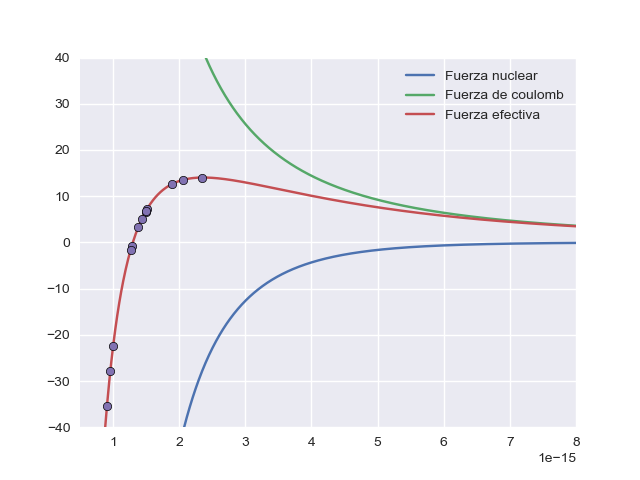

In [15]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(.5*10**(-15),8*10**(-15)), ylim=(-40, 40))
ax.plot(x,-gs*alpha*np.exp(-alpha*x)*x**-1-gs*np.exp(-alpha*x)*x**-2,label='Fuerza nuclear')
ax.plot(x,k*e**2*(x)**(-2),label='Fuerza de coulomb')
ax.plot(x,-gs*alpha*np.exp(-alpha*x)*x**-1-gs*np.exp(-alpha*x)*x**-2+k*e**2*(x)**(-2),label='Fuerza efectiva')
enjambre, = ax.plot(posicion[0], potencial2(posicion[0]),'o',markersize=6,markeredgecolor='black',markeredgewidth=.5)

plt.legend()

def animate(i):
    enjambre.set_data(posicion[i],potencial2(posicion[i]))
    return enjambre,

anim = animation.FuncAnimation(fig,animate,12,interval=600)   
plt.show()